In [1]:
import uproot

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
tree = uproot.open("../detector_simulation/build/local_detsim.root:Hits")

In [3]:
data = tree.arrays(library="pd")
display(data)

,fEvent,fChannel,fEnergy,fTime
0,0,1022,0.000002,3.840903
1,0,1022,0.000003,3.490367
2,0,2022,0.000003,3.582033
3,0,1022,0.000003,5.152466
4,0,1022,0.000003,3.652693
...,...,...,...,...
25044,4,11022,0.000002,2.407794
25045,4,11022,0.000004,1.947909
25046,4,11022,0.000003,2.465255
25047,4,11022,0.000003,2.425898


In [4]:
data_evt = data.loc[data["fEvent"] == 3]
display(data_evt)

,fEvent,fChannel,fEnergy,fTime
14587,3,1021,0.000003,6.409754
14588,3,1022,0.000003,4.772352
14589,3,2022,0.000002,4.984704
14590,3,1022,0.000002,3.421452
14591,3,1022,0.000002,4.861354
...,...,...,...,...
21427,3,19022,0.000002,6.561891
21428,3,20022,0.000002,4.994474
21429,3,20022,0.000003,9.318429
21430,3,19022,0.000002,4.132874


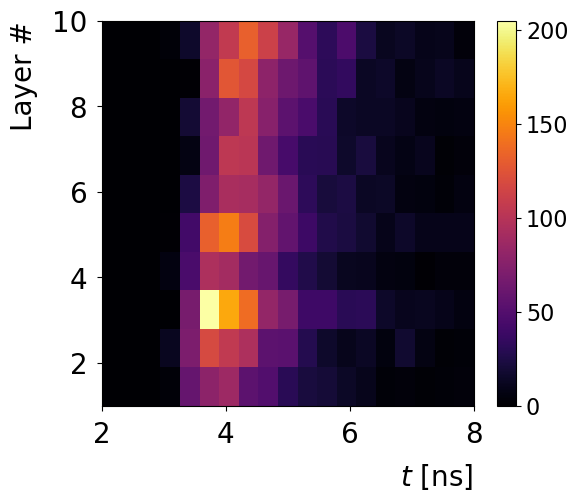

In [5]:
fig, ax = plt.subplots(figsize=(6,5))

cmap="inferno"
norm = matplotlib.colors.Normalize()
im = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

ax.hist2d(data_evt["fTime"], np.ceil(data_evt["fChannel"]//1000/2), bins=[np.linspace(2, 8, 20), 10], cmap=cmap, norm=norm)

ax.set_xlabel(r"$t ~ [\mathrm{ns}]$", fontsize=20, labelpad=10, loc="right")
ax.set_ylabel(r"Layer #", fontsize=20, labelpad=10, loc="top")

ax.tick_params(axis='both', which='major', labelsize=20, pad=7)

cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=16)

plt.show()

In [6]:
data_evt.loc[(data_evt["fChannel"] >= 2000)&(data_evt["fChannel"] < 3000)]["fChannel"]

14589    2022
14594    2021
14597    2022
14599    2022
14601    2020
         ... 
15067    2021
15068    2021
15069    2021
15070    2021
15071    2021
Name: fChannel, Length: 239, dtype: int32

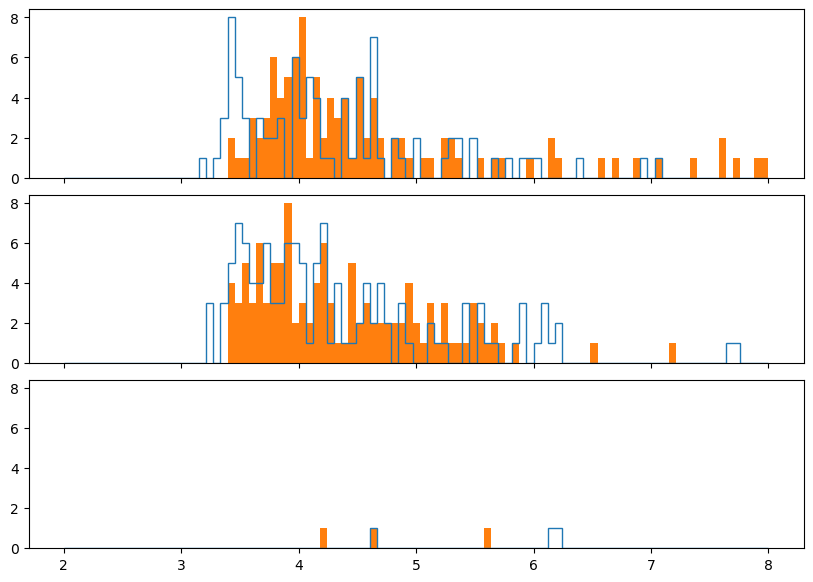

In [9]:
fig = plt.figure(figsize=(10,7))
gs = fig.add_gridspec(3, 1, wspace=0.1, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=True)

for i, chan in enumerate([21, 22, 23]):

    data_chan = data_evt.loc[data_evt["fChannel"] == 1000+chan]
    axs[i].hist(data_chan["fTime"], bins=np.linspace(2, 8, 100), histtype="step")

    data_chan = data_evt.loc[data_evt["fChannel"] == 2000+chan]
    axs[i].hist(data_chan["fTime"], bins=np.linspace(2, 8, 100), histtype="stepfilled")

plt.show()